# Actividad: Análisis exploratorio con técnicas de agrupamiento

> Alfonso Pineda Cedillo | A01660394

**Fecha de entrega:** 8 de Septiembre de 2023

---

Descarga el conjunto de datos socioeconómicos de los países del mundo, y haz lo siguiente:

1. Aplica k-medias sobre le conjunto de datos para generar un agrupamiento para los países de la base de datos. Utiliza al menos dos métodos para estimar el número óptimo de grupos.

2. Repita lo anterior, pero con otro método de agrupamiento que elijas.

3. Investiga qué librerías hay en Python para la implementación de mapas autoorganizados, y selecciona alguna para el agrupamiento de los datos de este ejercicio. Algunos ejemplos de librerías son:

    - Minosom
    - sklearn-som

4. De los resultados que se obtienen del agrupamiento, indica si los grupos formados siguen algun patrón que esperabas, o tiene información nueva que no hayas considerado anteriormente.

### Solución Ejercicio 1

Importamos las librerías necesarias para el ejercicio.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch
from minisom import MiniSom
from sklearn_som.som import SOM

Cargamos el dataset a utilizar.

In [3]:
data = pd.read_csv('country_data.csv')

Eliminamos la columna `country`, ya que no es necesaria para el ejercicio.

In [4]:
X = data.drop('country', axis=1)

Hacemos un escalamiento de los datos para que todos los valores estén en la misma escala.

In [5]:
# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Paso 1:** Aplicamos k-medias sobre le conjunto de datos para generar un agrupamiento para los países de la base de datos. Utiliza al menos dos métodos para estimar el número óptimo de grupos.

El método del codo y el método de la silueta son dos técnicas comunes utilizadas para estimar el número óptimo de grupos (clústeres) en un conjunto de datos antes de aplicar algoritmos de agrupamiento, como K-Means o agrupamiento jerárquico. Ambos métodos ayudan a tomar decisiones informadas sobre la elección de la cantidad adecuada de grupos para el análisis.

**Método del Codo (Elbow Method)**

El método del codo es una técnica gráfica que se utiliza para encontrar el número óptimo de clústeres en un conjunto de datos. El procedimiento implica ejecutar un algoritmo de agrupamiento (K-Means en este caso) para un rango de valores de k (número de clústeres) y luego graficar los resultados. El objetivo es identificar el punto en el gráfico donde la suma de las distancias al cuadrado de cada punto de datos a su clúster más cercano (también conocida como la "inercia" o "suma de cuadrados internos") deja de disminuir drásticamente y forma una curva que se asemeja a un codo.

El método del codo es útil para identificar un número de clústeres que equilibre la capacidad de representación del modelo con la simplicidad. Sin embargo, en algunos casos, la curva puede no tener un codo claro, lo que hace que la elección de k sea más subjetiva. Además, el método del codo no siempre funciona bien cuando los clústeres tienen formas no convexas, o cuando los puntos de datos están muy dispersos.

/Users/alfonsopineda/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alfonsopineda/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alfonsopineda/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alfonsopineda/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

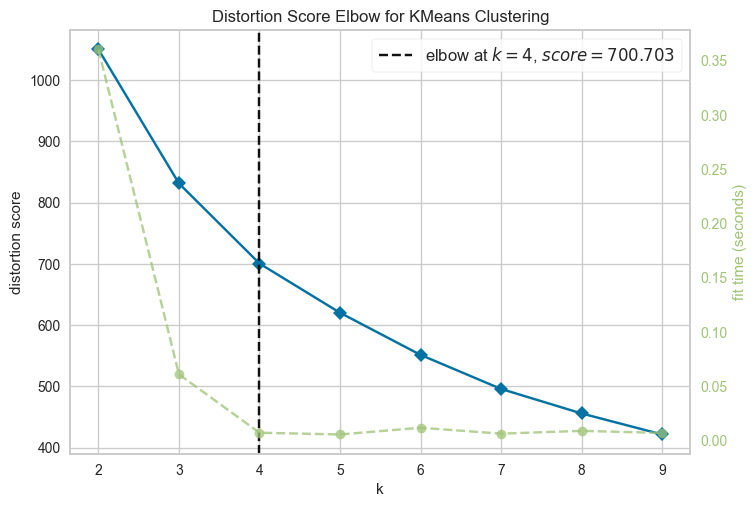

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
# Método 1: Método del codo
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_scaled)
visualizer.show()

**Metodo de la Silueta (Silhouette Method)**

El método de la silueta es otra técnica para estimar el número óptimo de clústeres en un conjunto de datos. A diferencia del método del codo, que se basa en la inercia, el método de la silueta utiliza la calidad de la agrupación como métrica para determinar la cohesión y la separación de los clústeres.

El método de la silueta proporciona una medida de qué tan bien separados están los clústeres y cuán similares son los puntos dentro de cada clúster. Un valor de silueta más alto indica una mejor calidad de agrupación. Sin embargo, el método de la silueta puede ser más robusto que el método del codo en casos donde los grupos tienen formas y tamaños diferentes.

/Users/alfonsopineda/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alfonsopineda/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alfonsopineda/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alfonsopineda/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

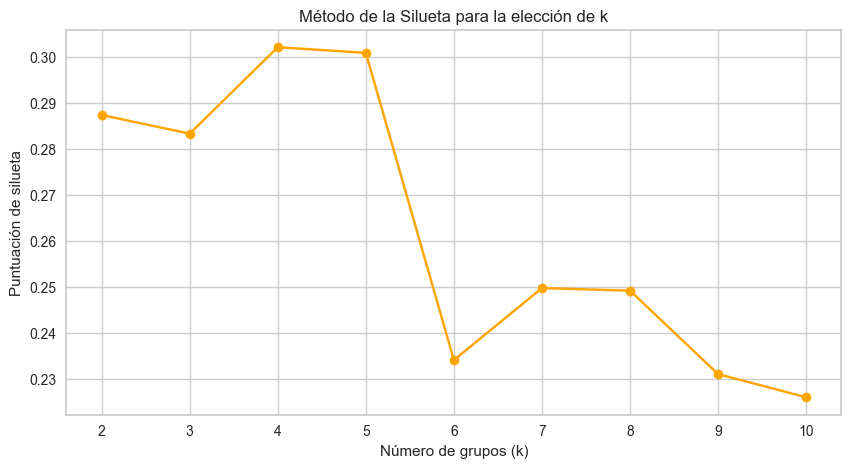

In [10]:
# Método 2: Utilizar el método de la silueta
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Graficamos los resultados del método de la silueta
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='orange')
plt.xlabel('Número de grupos (k)')
plt.ylabel('Puntuación de silueta')
plt.title('Método de la Silueta para la elección de k')
plt.grid(True)
plt.show()

Basándonos en los resultados consistentes de ambos métodos, hemos decidido seleccionar $k=4$ como el número óptimo de grupos para nuestro análisis de clustering de datos socioeconómicos de países. Esto significa que los países se han agrupado en cuatro categorías distintas en función de las características consideradas en el conjunto de datos. Estos grupos podrían representar diferentes niveles de desarrollo económico o perfiles socioeconómicos, y serán útiles para futuros análisis y toma de decisiones. Sin embargo, es importante tener en cuenta que esta elección es un punto de partida y podría ser refinada posteriormente según los objetivos específicos del análisis.

**Paso 2:** Repita lo anterior, pero con otro método de agrupamiento que elijas.

En este análisis, hemos aplicado el método de agrupamiento aglomerativo a nuestro conjunto de datos socioeconómicos de países del mundo con el objetivo de identificar patrones de similitud y formar grupos significativos. El método de agrupamiento aglomerativo es una técnica jerárquica que comienza con cada punto de datos como un grupo individual y luego fusiona gradualmente los grupos más cercanos en un proceso iterativo. A continuación, presentamos los resultados de este proceso:

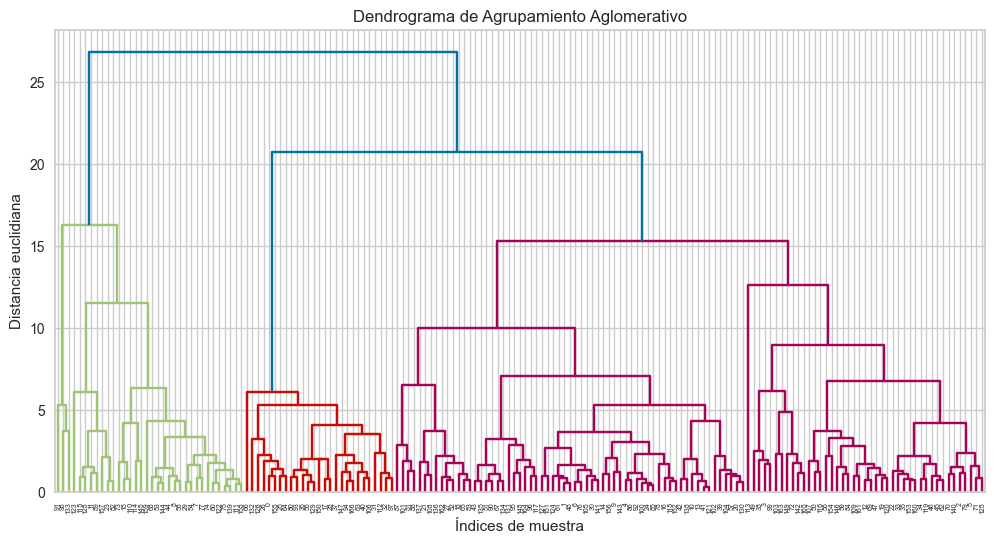

In [16]:
# Método de agrupamiento aglomerativo
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_scaled)

# Calculamos la matriz de enlace de aglomeración
linkage_matrix = sch.linkage(X_scaled, method='ward')

# Visualizamos el dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Dendrograma de Agrupamiento Aglomerativo")
plt.xlabel("Índices de muestra")
plt.ylabel("Distancia euclidiana")
plt.show()

Una vez seleccionado el número de clusters (k=4), se procedió a realizar el agrupamiento aglomerativo con esta configuración. Además, se calculó la matriz de enlace de aglomeración utilizando el método de Ward, que mide la distancia entre clusters de manera que minimiza la varianza dentro de los clusters.

El dendrograma resultante es una representación gráfica de cómo se agrupan los países a medida que se fusionan en clusters más grandes. En el dendrograma, el eje vertical muestra la distancia euclidiana entre los clusters o los puntos individuales, mientras que el eje horizontal representa los índices de los países.

A pesar de que los métodos de codo y silueta sugirieron 4 clusters como el número óptimo de clusters para nuestro conjunto de datos, el dendrograma muestra que los países se pueden agrupar en 3 clusters distintos. Esto significa que los países se pueden agrupar en 3 categorías distintas en función de las características consideradas en el conjunto de datos. 

Al observar el dendrograma, podemos identificar patrones interesantes en la agrupación de los países. Se pueden identificar tres clusters principales, que están representados por los niveles más bajos del dendrograma. Estos clusters se fusionan gradualmente en clusters más grandes a medida que subimos en el dendrograma.

La distancia euclidiana entre los clusters y los países individuales indica la similitud entre ellos. Los países que se encuentran en la misma rama del dendrograma comparten características socioeconómicas similares, mientras que aquellos que están en ramas separadas pueden tener diferencias significativas en sus perfiles socioeconómicos.

/Users/alfonsopineda/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


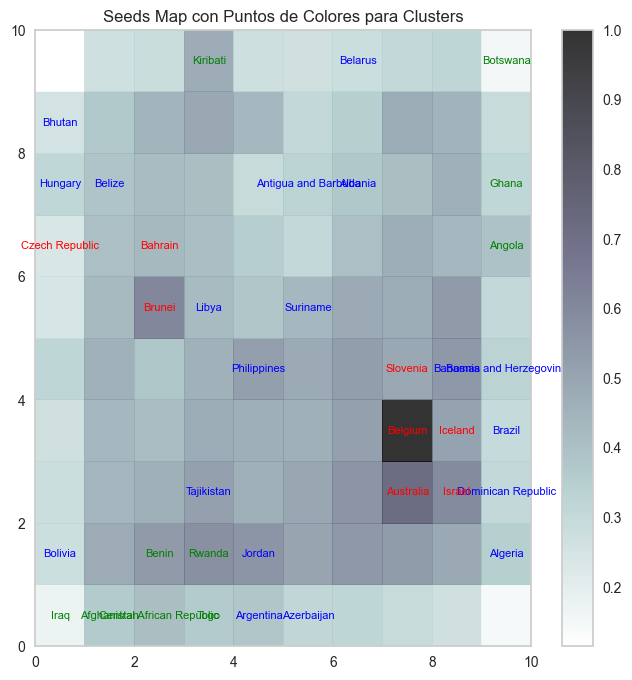

In [61]:
# Seleccionar las características para el clustering
X = data.drop('country', axis=1)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering K-Means para obtener los clusters
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(X_scaled)

# Crear una instancia de SOM
som = MiniSom(x=10, y=10, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)

# Entrenar el SOM
som.train_random(data=X_scaled, num_iteration=100)

# Encontrar las muestras más cercanas a cada neurona (semillas)
seed_indices = {}
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    if w in seed_indices:
        seed_indices[w].append(i)
    else:
        seed_indices[w] = [i]

# Colores para los clusters
cluster_colors = {0: 'red', 1: 'green', 2: 'blue'}

# Visualizar el mapa SOM con las semillas y los puntos de colores de los clusters
plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=0.8)
plt.colorbar()

# Superponer los puntos de colores de los clusters en el mapa de semillas
for w, indices in seed_indices.items():
    cluster_label = cluster_labels[indices[0]]  # Tomamos el cluster de la primera muestra
    country = data['country'][indices[0]]
    plt.text(w[0] + 0.5, w[1] + 0.5, country, color=cluster_colors[cluster_label], fontsize=8, ha='center', va='center')

plt.title('Seeds Map con Puntos de Colores para Clusters')
plt.show()

**Paso 4:** De los resultados que se obtienen del agrupamiento, indica si los grupos formados siguen algun patrón que esperabas, o tiene información nueva que no hayas considerado anteriormente.

El Mapa de Semillas resultante se presenta como una visualización en la que cada neurona (celda) del SOM representa un conjunto de países que tienen características socioeconómicas similares. A continuación, presentamos nuestras observaciones y conclusiones clave:

- **Agrupamiento Visual:** En el mapa de semillas, observamos claramente la formación de tres grupos distintos, cada uno representando un cluster de países. Estos grupos están claramente delineados por colores (rojo, verde y azul), que indican la pertenencia al cluster correspondiente.

- **Similaridad de Países:** Dentro de cada cluster, los países están ubicados cerca unos de otros. Esto sugiere que los países dentro de un mismo cluster comparten características socioeconómicas similares. Por ejemplo, países con altos ingresos per cápita y buenas condiciones de salud pueden agruparse en un cluster.

- **Interpretación de Colores:** Los colores utilizados para representar los clusters (rojo, verde y azul) son solo identificadores visuales y no tienen un significado intrínseco en términos de las características de los países. Es importante tener en cuenta que la asignación de colores es aleatoria y no implica ningún juicio sobre la calidad o el estado de los países.

 El uso de SOM y la visualización en forma de Mapa de Semillas proporciona una perspectiva única para comprender las similitudes y diferencias entre países en función de múltiples variables socioeconómicas. Este enfoque es valioso para identificar patrones y tendencias que pueden no ser evidentes en análisis tradicionales.